# Challenges of motherhood - Young MUM’s urgent questions - Part 2

In [3]:
import pandas as pd
import nltk
from collections import Counter
import time
import string
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
porter = PorterStemmer()
import statistics
import numpy as np

### Import already preprocessed Data:

In [116]:
df_message = pd.read_csv('preprocessed_data_5.csv',low_memory=False)

In [117]:
df_message.head()

,Unnamed: 0,stemming_as_string,stemming_as_tokens,preprocessed,preprocessed_as_string,language,language_label,language_acc
0,0,brauchen stammzellspend kleinen jungen jemande...,"['brauchen', 'stammzellspend', 'kleinen', 'jun...","['brauchen', 'stammzellspend', 'kleinen', 'jun...",brauchen stammzellspend kleinen jungen jemande...,"(('__label__de',), array([0.94009244]))","('__label__de',)",[0.94009244]
1,1,nachdenken irgendwo draußen gibt frau jahr kin...,"['nachdenken', 'irgendwo', 'draußen', 'gibt', ...","['nachdenken', 'irgendwo', 'draußen', 'gibt', ...",nachdenken irgendwo draußen gibt frau jahr kin...,"(('__label__de',), array([0.967152]))","('__label__de',)",[0.967152]
2,2,menschen mehr essen gebt kuchen. österreichisc...,"['menschen', 'mehr', 'essen', 'gebt', 'kuchen....","['menschen', 'mehr', 'essen', 'gebt', 'kuchen....",menschen mehr essen gebt kuchen. österreichisc...,"(('__label__de',), array([0.97207975]))","('__label__de',)",[0.97207975]
3,3,kommentar friedrich zwei leben drei gewissenlo...,"['kommentar', 'friedrich', 'zwei', 'leben', 'd...","['kommentar', 'friedrich', 'zwei', 'leben', 'd...",kommentar friedrich zwei leben drei gewissenlo...,"(('__label__de',), array([0.97753567]))","('__label__de',)",[0.97753567]
4,4,geburt hebamm allein irgendwo natur alleingebu...,"['geburt', 'hebamm', 'allein', 'irgendwo', 'na...","['geburt', 'hebamm', 'allein', 'irgendwo', 'na...",geburt hebamm allein irgendwo natur alleingebu...,"(('__label__de',), array([0.94404107]))","('__label__de',)",[0.94404107]


In [118]:
df_message_new = pd.DataFrame({'preprocessed_as_string': df_message['preprocessed_as_string']})

In [119]:
df_message_new['preprocessed'] = df_message_new['preprocessed_as_string'].str.split("\\s")

In [120]:
df_message_new = df_message_new.dropna()

In [121]:
df_message_new.shape

(191542, 2)

In [122]:
df_message_new.head()

,preprocessed_as_string,preprocessed
0,brauchen stammzellspend kleinen jungen jemande...,"[brauchen, stammzellspend, kleinen, jungen, je..."
1,nachdenken irgendwo draußen gibt frau jahr kin...,"[nachdenken, irgendwo, draußen, gibt, frau, ja..."
2,menschen mehr essen gebt kuchen. österreichisc...,"[menschen, mehr, essen, gebt, kuchen., österre..."
3,kommentar friedrich zwei leben drei gewissenlo...,"[kommentar, friedrich, zwei, leben, drei, gewi..."
4,geburt hebamm allein irgendwo natur alleingebu...,"[geburt, hebamm, allein, irgendwo, natur, alle..."


### Topic Modelling

#### Simply count words

In [123]:
from functools import reduce
import operator

In [124]:
start_time = time.time()
l1 = reduce(operator.concat, df_message_new['preprocessed'][:10000])
end_time = time.time()
print(end_time-start_time)

56.055092334747314


In [125]:
c = Counter(l1)
c.most_common(20)

[('babi', 8032),
 ('mehr', 4596),
 ('schon', 4276),
 ('immer', 4158),
 ('geburt', 3939),
 ('leben', 3495),
 ('kind', 3468),
 ('mal', 3464),
 ('ganz', 3317),
 ('gibt', 2992),
 ('menschen', 2892),
 ('ja', 2788),
 ('wurd', 2662),
 ('jahr', 2653),
 ('zeit', 2636),
 ('kinder', 2502),
 ('einfach', 2460),
 ('lieb', 2444),
 ('viel', 2398),
 ('heut', 2243)]

#### Wordcloud

In [157]:
#pip install --upgrade wordcloud

In [158]:
from wordcloud import WordCloud

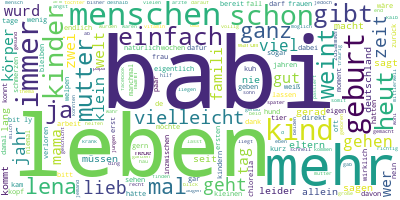

In [167]:
# Join the different words of the first n posts together.
long_string = sum(df_message_new['preprocessed'][:500], [])
long_string = ','.join(result)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(result)

# Visualize the word cloud
wordcloud.to_image()

#### LDA

In [126]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os

In [127]:
#pip install --upgrade pyLDAvis
#pip install --upgrade gensim

In [128]:
# Create Dictionary
id2word = corpora.Dictionary(df_message_new['preprocessed'])
# Create Corpus
texts = df_message_new['preprocessed']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 6), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [129]:
# number of topics
num_topics = 25

In [130]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(19,
  '0.027*"babi" + 0.006*"kind" + 0.006*"uhr" + 0.005*"ab" + 0.005*"mama" + '
  '0.004*"mehr" + 0.004*"schon" + 0.004*"gibt" + 0.004*"ganz" + 0.004*"gern"'),
 (17,
  '0.006*"leben" + 0.005*"mehr" + 0.004*"menschen" + 0.004*"mal" + '
  '0.004*"gibt" + 0.004*"immer" + 0.003*"geburt" + 0.003*"lieb" + 0.003*"ƹӝʒ" '
  '+ 0.003*"ganz"'),
 (16,
  '0.007*"babi" + 0.005*"schon" + 0.005*"jahr" + 0.004*"mehr" + 0.003*"gibt" + '
  '0.003*"heut" + 0.003*"immer" + 0.003*"wer" + 0.003*"kind" + 0.003*"geht"'),
 (1,
  '0.008*"babi" + 0.005*"schon" + 0.004*"mal" + 0.004*"wurd" + 0.003*"erst" + '
  '0.003*"dank" + 0.003*"immer" + 0.003*"kind" + 0.003*"mehr" + 0.003*"heut"'),
 (23,
  '0.008*"leben" + 0.006*"babi" + 0.006*"jahr" + 0.005*"mehr" + 0.005*"gibt" + '
  '0.004*"immer" + 0.004*"ganz" + 0.004*"schon" + 0.004*"wurd" + '
  '0.004*"menschen"'),
 (22,
  '0.007*"babi" + 0.005*"schon" + 0.004*"gibt" + 0.004*"uhr" + 0.003*"gut" + '
  '0.003*"wer" + 0.003*"mehr" + 0.003*"eltern" + 0.003*"jahr" + '
  

In [131]:
lda_model

In [132]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/magdalena/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.016490 -0.096635       1        1  13.276908
23    -0.043513  0.016313       2        1   8.742602
15    -0.035253  0.074873       3        1   7.779393
11    -0.009703  0.017160       4        1   5.323685
24    -0.018064  0.003998       5        1   5.031020
18     0.210477  0.028616       6        1   4.888624
9     -0.028425 -0.004683       7        1   4.245218
0     -0.022491  0.005217       8        1   4.241575
12     0.010504  0.001448       9        1   4.152148
14    -0.020794 -0.028960      10        1   3.471683
4     -0.019280  0.008249      11        1   3.431312
5     -0.028871 -0.001096      12        1   3.178434
6      0.031039 -0.050339      13        1   3.130015
1      0.005646 -0.003586      14        1   3.090951
8     -0.010797  0.004013      15        1   3.029696
17    -0.003087  0.046570      16        1   2.967003
22    -0.002909 -0.003303      17        1   2.745631
3     -0.001674 -0.053425      18        1   2.660620
7     -0.000385 -0.004109      19        1   2.273270
13    -0.047263  0.043478      20        1   2.198857
16     0.002170  0.021020      21        1   2.094829
20     0.013522  0.020404      22        1   2.084690
2      0.009285  0.003546      23        1   2.047934
21    -0.007216 -0.011591      24        1   1.983915
10     0.033575 -0.037178      25        1   1.929986, topic_info=          Term           Freq          Total Category  logprob  loglift
34807     user   14803.000000   14803.000000  Default  30.0000  30.0000
1354       the   17715.000000   17715.000000  Default  29.0000  29.0000
107       babi  119525.000000  119525.000000  Default  28.0000  28.0000
899       hund   15452.000000   15452.000000  Default  27.0000  27.0000
171        mal   44113.000000   44113.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
1511      erst     374.125490   23195.811889  Topic25  -6.4910  -0.1795
688       lieb     386.158345   33649.633177  Topic25  -6.4594  -0.5199
822    stillen     370.827662   23507.796749  Topic25  -6.4999  -0.2017
1631      viel     371.384497   30256.191974  Topic25  -6.4984  -0.4526
646        wer     363.309862   27860.598389  Topic25  -6.5203  -0.3921

[2463 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
84258      8  0.032547    +2
84258     10  0.010849    +2
84258     13  0.010849    +2
84258     15  0.867919    +2
84258     17  0.010849    +2
...      ...       ...   ...
82804     20  0.025949     🥗
82804     22  0.557896     🥗
82804     24  0.051897     🥗
83794     20  0.924031    🥳🥰
12954     15  0.885914  🧜‍♂️

[16893 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 24, 16, 12, 25, 19, 10, 1, 13, 15, 5, 6, 7, 2, 9, 18, 23, 4, 8, 14, 17, 21, 3, 22, 11])

#### Interpretation of possible topics:


In [101]:
ind = df_message['sentences'].str.contains('jesu')
print(sum(ind))
df_message['sentences'][ind]

116


1959      # **detoxmasc machine** # final handjob 4 jesu...
1962      Halli hallo! Hier sind Thea und Sammy von den ...
3888      Und das sei für euch das Zeichen: Ihr werdet e...
7400      Egal ob unser Messias und Erlöser an Sukkoth o...
7551      Das EIKON-Projekt: Unter uns Weihnachten - all...
                                ...                        
184165    Jesus war vor Abraham und vor der Geburt durch...
185429    Richtig, freundschatz und Toleranz immer gut, ...
185709    Was hat Jesu Geburt mit den jungen Gefangenen ...
187461    Weihnachten feiern wir die Geburt von Jesus Ch...
190116    In 12 Tagen ist es soweit. Wir wollen gemeinsa...
Name: sentences, Length: 116, dtype: object

In [ ]:
df_message